# Imports

In [17]:
import numpy as np
import sklearn as sk
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
import gc
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
from pylab import rcParams
import pickle
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
import matplotlib.font_manager
warnings.filterwarnings("ignore")

# Data Load

In [18]:
df = pd.read_csv('DG_out.csv', sep=',')
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0


In [19]:
df.drop('tx_hash', axis=1, inplace=True)
df.drop('in_malicious', axis=1, inplace=True)
df.drop('out_malicious', axis=1, inplace=True)
df.drop('is_malicious', axis=1, inplace=True)
df.drop('all_malicious', axis=1, inplace=True)

df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,3.570468e-06
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,1.889565e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00


In [20]:
# Ensure no duplicate columns
df.columns = [col + '_orig' if df.columns.duplicated()[i] else col for i, col in enumerate(df.columns)]

In [21]:
# Display the DataFrame description
df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,3.570468e-06
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,1.889565e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00


In [22]:
# Print the class distribution
print('No Frauds', round(df['out_and_tx_malicious'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['out_and_tx_malicious'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

No Frauds 100.0 % of the dataset
Frauds 0.0 % of the dataset


In [23]:
df['out_and_tx_malicious'].value_counts()

out_and_tx_malicious
0    30248026
1         108
Name: count, dtype: int64

# Scale transform

In [26]:
from sklearn.preprocessing import RobustScaler

# Create a copy of the DataFrame for scaling
scaled_df = df.copy()

# Apply log transformation to normalize the data
scaled_df['log_indegree'] = np.log1p(scaled_df['indegree'])
scaled_df['log_outdegree'] = np.log1p(scaled_df['outdegree'])
scaled_df['log_in_btc'] = np.log1p(scaled_df['in_btc'])
scaled_df['log_out_btc'] = np.log1p(scaled_df['out_btc'])
scaled_df['log_total_btc'] = np.log1p(scaled_df['total_btc'])
scaled_df['log_mean_in_btc'] = np.log1p(scaled_df['mean_in_btc'])
scaled_df['log_mean_out_btc'] = np.log1p(scaled_df['mean_out_btc'])

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler to log-transformed columns
scaled_df['scaled_log_indegree'] = robust_scaler.fit_transform(scaled_df['log_indegree'].values.reshape(-1, 1))
scaled_df['scaled_log_outdegree'] = robust_scaler.fit_transform(scaled_df['log_outdegree'].values.reshape(-1, 1))
scaled_df['scaled_log_in_btc'] = robust_scaler.fit_transform(scaled_df['log_in_btc'].values.reshape(-1, 1))
scaled_df['scaled_log_out_btc'] = robust_scaler.fit_transform(scaled_df['log_out_btc'].values.reshape(-1, 1))
scaled_df['scaled_log_total_btc'] = robust_scaler.fit_transform(scaled_df['log_total_btc'].values.reshape(-1, 1))
scaled_df['scaled_log_mean_in_btc'] = robust_scaler.fit_transform(scaled_df['log_mean_in_btc'].values.reshape(-1, 1))
scaled_df['scaled_log_mean_out_btc'] = robust_scaler.fit_transform(scaled_df['log_mean_out_btc'].values.reshape(-1, 1))

In [27]:
# Drop the original and log-transformed columns to avoid redundancy (highlighted modification)
columns_to_drop = ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc', 
                   'log_indegree', 'log_outdegree', 'log_in_btc', 'log_out_btc', 'log_total_btc', 'log_mean_in_btc', 'log_mean_out_btc']
scaled_df.drop(columns_to_drop, axis=1, inplace=True)

In [28]:
# Display the head of the scaled DataFrame
scaled_df.head()

,out_and_tx_malicious,scaled_log_indegree,scaled_log_outdegree,scaled_log_in_btc,scaled_log_out_btc,scaled_log_total_btc,scaled_log_mean_in_btc,scaled_log_mean_out_btc
0,0,-1.709511,-0.405465,-0.304217,1.472123,1.024103,-0.234538,2.129307
1,0,0.000000,0.000000,1.511358,1.472123,1.270063,1.917297,1.723263
2,0,0.000000,-0.405465,0.803044,0.779315,0.704707,1.077797,1.204834
3,0,0.000000,-0.405465,1.410576,1.247272,1.143198,1.797850,1.829269
4,0,0.000000,0.000000,1.281474,1.247272,1.088554,1.644837,1.430656


In [29]:
del df #free memory
gc.collect()

1138

# Split

In [30]:
# Split the dataset into training and testing sets
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(scaled_df.iloc[:, :-1], scaled_df['out_and_tx_malicious'], test_size=0.20, random_state=10)

In [31]:
# Display the shapes of the resulting datasets
print("Training features shape:", original_Xtrain.shape)
print("Testing features shape:", original_Xtest.shape)
print("Training labels shape:", original_ytrain.shape)
print("Testing labels shape:", original_ytest.shape)

Training features shape: (24198507, 7)
Testing features shape: (6049627, 7)
Training labels shape: (24198507,)
Testing labels shape: (6049627,)


In [32]:
# Display class counts in training and testing sets
print(pd.value_counts(original_ytrain))
print(pd.value_counts(original_ytest))

out_and_tx_malicious
0    24198425
1          82
Name: count, dtype: int64
out_and_tx_malicious
0    6049601
1         26
Name: count, dtype: int64


In [33]:
del scaled_df #free memory
gc.collect()

0

# Get Training Sample

In [37]:
from sklearn.utils import shuffle

# Ensure no duplicate columns in the concatenated DataFrame
original_train_df = pd.concat([original_Xtrain.reset_index(drop=True), original_ytrain.reset_index(drop=True)], axis=1)

# Correctly referencing the target column after reset_index
original_train_normal_df = original_train_df[original_train_df.iloc[:, -1] == 0]
original_train_fraud_df = original_train_df[original_train_df.iloc[:, -1] == 1]

def get_training_sample(n):
    normal_sample = original_train_normal_df.sample(n)
    final_sample = pd.concat([normal_sample, original_train_fraud_df])
    final_sample = shuffle(final_sample)
    return final_sample.iloc[:, :-1].values, final_sample.iloc[:, -1].values
# usage of the function to get a balanced test sample
X_test_sample, y_test_sample = get_test_sample(200) 

# Display the shapes of the sample data
print("Sampled test features shape:", X_test_sample.shape)
print("Sampled test labels shape:", y_test_sample.shape)

Sampled test features shape: (226, 7)
Sampled test labels shape: (226,)


# Get Test Sample

In [38]:
# Ensure no duplicate columns in the concatenated test DataFrame
original_test_df = pd.concat([original_Xtest.reset_index(drop=True), original_ytest.reset_index(drop=True)], axis=1)

# Separate normal and fraud transactions in the test set
original_test_normal_df = original_test_df[original_test_df.iloc[:, -1] == 0]
original_test_fraud_df = original_test_df[original_test_df.iloc[:, -1] == 1]

def get_test_sample(n):
    normal_sample = original_test_normal_df.sample(n)
    final_sample = pd.concat([normal_sample, original_test_fraud_df])
    final_sample = shuffle(final_sample)
    return final_sample.iloc[:, :-1].values, final_sample.iloc[:, -1].values

# usage of the function to get a balanced test sample
X_test_sample, y_test_sample = get_test_sample(200) 

# Display the shapes of the sample data
print("Sampled test features shape:", X_test_sample.shape)
print("Sampled test labels shape:", y_test_sample.shape)

Sampled test features shape: (226, 7)
Sampled test labels shape: (226,)


# Oversample Training Data

In [40]:
from imblearn.over_sampling import SMOTE

def oversample_minority_class(X, y, sampling_strategy):
    sm = SMOTE(sampling_strategy=sampling_strategy, n_jobs=-1)
    return sm.fit_resample(X, y)

# Evaluation Metrics

In [42]:
from sklearn.metrics import (
    confusion_matrix, balanced_accuracy_score, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, 
    precision_recall_curve
)

def evaluate(actual, predicted, probability, time_complexity):
    eval_metric = {}
    
    # Time complexity
    eval_metric['time'] = time_complexity
    
    # Confusion matrix
    eval_metric['conf_matrix'] = confusion_matrix(actual, predicted)
    
    # Accuracy metrics
    eval_metric['balanced_accuracy'] = round(balanced_accuracy_score(actual, predicted), 7)
    eval_metric['accuracy'] = round(accuracy_score(actual, predicted), 7)
    
    # Macro-averaged metrics
    eval_metric['macro_precision'] = round(precision_score(actual, predicted, average="macro"), 7)
    eval_metric['macro_recall'] = round(recall_score(actual, predicted, average="macro"), 7)
    eval_metric['macro_f1'] = round(f1_score(actual, predicted, average="macro"), 7)
    eval_metric['macro_roc'] = round(roc_auc_score(actual, probability, average="macro"), 7)
    
    # Standard metrics
    eval_metric['precision'] = round(precision_score(actual, predicted), 7)
    eval_metric['recall'] = round(recall_score(actual, predicted), 7)
    eval_metric['f1'] = round(f1_score(actual, predicted), 7)
    eval_metric['roc'] = round(roc_auc_score(actual, probability), 7)
    
    # ROC curve
    false_pos_rate, true_pos_rate, thresholds = roc_curve(actual, probability)
    eval_metric['false_pos_rate'] = false_pos_rate
    eval_metric['true_pos_rate'] = true_pos_rate
    eval_metric['thresholds'] = thresholds
    
    # Precision-recall curve
    precision_rt, recall_rt, threshold_rt = precision_recall_curve(actual, probability)
    eval_metric['precision_rt'] = precision_rt
    eval_metric['recall_rt'] = recall_rt
    eval_metric['threshold_rt'] = threshold_rt
    
    return eval_metric

# Fit Model

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

epochs = 100
random_state = 42
batch_size = 256
outliers_fraction = 0.08169

print('Training Parameters:\n====================\n')
print('Epochs: ' + str(epochs))
print('Outliers Fraction: ' + str(outliers_fraction))

def fit_model(X_train):
    input_dim = X_train.shape[1]  # Number of features in the training data
    
    # Define the autoencoder architecture
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(6, activation='tanh')(input_layer)
    encoded = Dense(4, activation='tanh')(encoded)
    encoded = Dense(4, activation='tanh')(encoded)
    encoded = Dense(6, activation='tanh')(encoded)
    dropout = Dropout(0.1)(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(dropout)
    
    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoded)
    
    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
    
    # Train the autoencoder
    autoencoder.fit(X_train, X_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
    
    return autoencoder

Training Parameters:

Epochs: 100
Outliers Fraction: 0.08169


#  Modeling

In [53]:
import time
import numpy as np

training_evaluations = {}
test_evaluations = {}
model = {}

i = 0
X_train, y_train = oversample_minority_class(original_Xtrain, original_ytrain, outliers_fraction)

# Modeling
start = time.time()
clf = fit_model(X_train)
end = time.time()

# Get the reconstruction error of the training data
train_predictions = clf.predict(X_train)
y_train_scores = np.mean(np.power(X_train - train_predictions, 2), axis=1)  # Reconstruction error
y_train_pred = (y_train_scores > np.percentile(y_train_scores, 100 * (1 - outliers_fraction))).astype(int)  # Binary labels (0: inliers, 1: outliers)

training_time = round(end - start, 4)
model[i + 1] = clf
training_evaluations[i + 1] = evaluate(y_train, y_train_pred, y_train_scores, training_time)

print("Model Trained!")

# Testing
test_start = time.time()
test_predictions = clf.predict(original_Xtest)
y_test_scores = np.mean(np.power(original_Xtest - test_predictions, 2), axis=1)  # Reconstruction error
y_test_pred = (y_test_scores > np.percentile(y_test_scores, 100 * (1 - outliers_fraction))).astype(int)  # Binary labels (0: inliers, 1: outliers)
test_end = time.time()
testing_time = round(test_end - test_start, 4)
test_evaluations[i + 1] = evaluate(original_ytest, y_test_pred, y_test_scores, testing_time)

print("Evaluation completed! Training Time: " + str(training_time) + " seconds, Testing Time: " + str(testing_time) + " seconds")

Epoch 1/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 61s 734us/step - loss: 0.0264 - val_loss: 0.1233
Epoch 2/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 60s 731us/step - loss: 0.0205 - val_loss: 0.1232
Epoch 3/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 60s 731us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 4/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 62s 751us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 5/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 60s 734us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 6/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 61s 734us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 7/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 61s 735us/step - loss: 0.0204 - val_loss: 0.1231
Epoch 8/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 61s 737us/step - loss: 0.0204 - val_loss: 0.1231
Epoch 9/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 65s 791us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 10/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 64s 780us/step - loss: 0.0205 - val_loss: 0.1231
Epoch 11/100
81798/81798 ━━━━━━━━━━━━━━━━━━━━ 63s 759us/ste

# Tabular Evaluation

In [56]:
training_eval_df = pd.DataFrame(columns=['Iteration', 'Accuracy', 'Balanced-Accuracy', 'Macro-Precision', 'Macro-Recall', 'Macro-F1', 'Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])
test_eval_df = pd.DataFrame(columns=['Iteration', 'Accuracy', 'Balanced-Accuracy', 'Macro-Precision', 'Macro-Recall', 'Macro-F1', 'Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])

# Collect training evaluation results
for it in training_evaluations.keys():
    training_eval_df = pd.concat([training_eval_df, pd.DataFrame([{
        'Iteration': str(it),
        'Accuracy': training_evaluations[it]['accuracy'],
        'Balanced-Accuracy': training_evaluations[it]['balanced_accuracy'],
        'Macro-Precision': training_evaluations[it]['macro_precision'],
        'Macro-Recall': training_evaluations[it]['macro_recall'],
        'Macro-F1': training_evaluations[it]['macro_f1'],
        'Macro-ROC': training_evaluations[it]['macro_roc'],
        'Precision': training_evaluations[it]['precision'],
        'Recall': training_evaluations[it]['recall'],
        'F1': training_evaluations[it]['f1'],
        'ROC': training_evaluations[it]['roc'],
        'Time': training_evaluations[it]['time']
    }])], ignore_index=True)

# Collect test evaluation results
for it in test_evaluations.keys():
    test_eval_df = pd.concat([test_eval_df, pd.DataFrame([{
        'Iteration': str(it),
        'Accuracy': test_evaluations[it]['accuracy'],
        'Balanced-Accuracy': test_evaluations[it]['balanced_accuracy'],
        'Macro-Precision': test_evaluations[it]['macro_precision'],
        'Macro-Recall': test_evaluations[it]['macro_recall'],
        'Macro-F1': test_evaluations[it]['macro_f1'],
        'Macro-ROC': test_evaluations[it]['macro_roc'],
        'Precision': test_evaluations[it]['precision'],
        'Recall': test_evaluations[it]['recall'],
        'F1': test_evaluations[it]['f1'],
        'ROC': test_evaluations[it]['roc'],
        'Time': test_evaluations[it]['time']
    }])], ignore_index=True)

In [59]:
# Sort the DataFrame based on the 'Macro-F1' column in descending order
training_eval_df = training_eval_df.sort_values('Macro-F1', ascending=False)

# Optionally, reset the index after sorting
training_eval_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(training_eval_df)

  Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
0         1  0.921746           0.738544          0.72201      0.738544   

   Macro-F1  Macro-ROC  Precision    Recall        F1       ROC       Time  
0  0.729884   0.934008   0.483269  0.522748  0.502234  0.934008  6229.2037  


In [60]:
# Sort the DataFrame based on the 'ROC' column in descending order
training_eval_df = training_eval_df.sort_values('ROC', ascending=False)

# Optionally, reset the index after sorting
training_eval_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(training_eval_df)

  Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
0         1  0.921746           0.738544          0.72201      0.738544   

   Macro-F1  Macro-ROC  Precision    Recall        F1       ROC       Time  
0  0.729884   0.934008   0.483269  0.522748  0.502234  0.934008  6229.2037  


In [61]:
# Sort the DataFrame based on the 'Macro-F1' column in descending order
test_eval_df = test_eval_df.sort_values('Macro-F1', ascending=False)

# Optionally, reset the index after sorting
test_eval_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(test_eval_df)

  Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
0         1  0.918973           0.824871         0.500019      0.824871   

   Macro-F1  Macro-ROC  Precision    Recall        F1       ROC     Time  
0  0.478927   0.946807   0.000039  0.730769  0.000077  0.946807  137.636  


In [62]:
# Sort the DataFrame based on the 'ROC' column in descending order
test_eval_df = test_eval_df.sort_values('ROC', ascending=False)

# Optionally, reset the index after sorting
test_eval_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(test_eval_df)

  Iteration  Accuracy  Balanced-Accuracy  Macro-Precision  Macro-Recall  \
0         1  0.918973           0.824871         0.500019      0.824871   

   Macro-F1  Macro-ROC  Precision    Recall        F1       ROC     Time  
0  0.478927   0.946807   0.000039  0.730769  0.000077  0.946807  137.636  


# Visualization

### Metrics

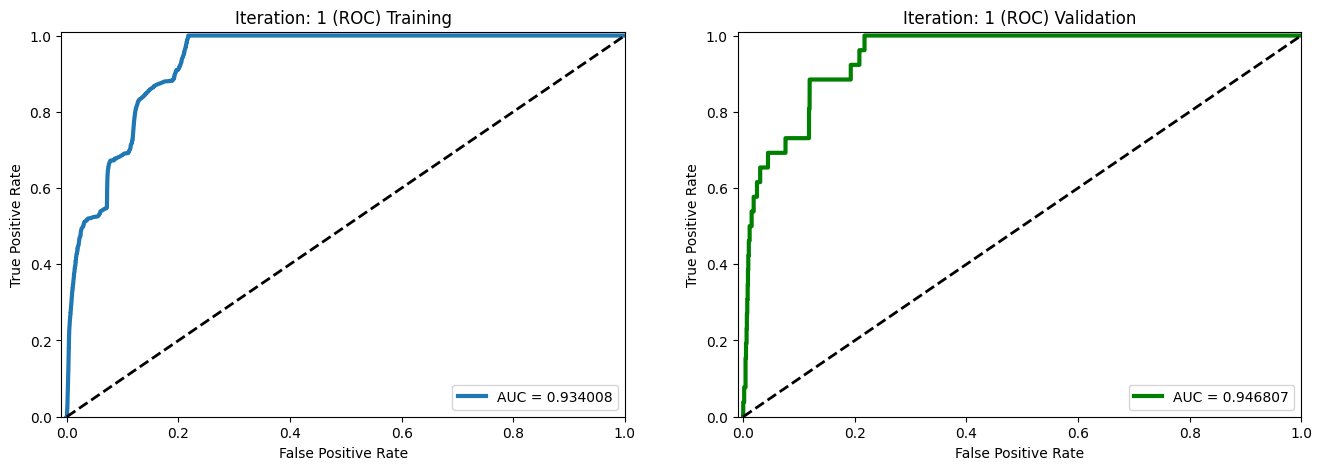

<Figure size 640x480 with 0 Axes>

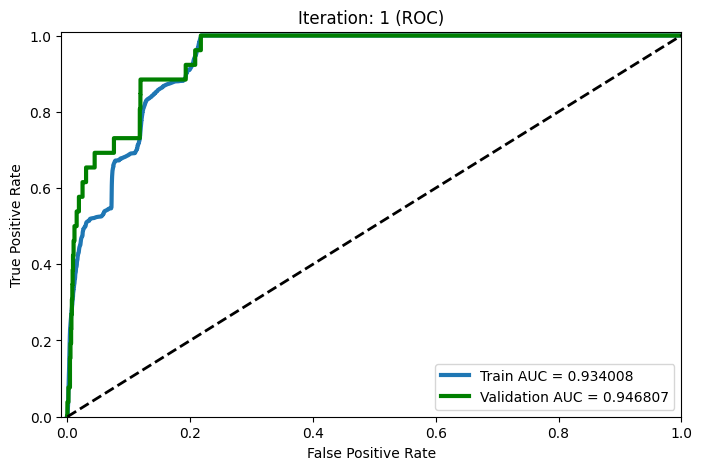

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

it = 1
false_pos_rate = training_evaluations[it]['false_pos_rate']
true_pos_rate = training_evaluations[it]['true_pos_rate']
roc_auc = auc(false_pos_rate, true_pos_rate)

test_false_pos_rate = test_evaluations[it]['false_pos_rate']
test_true_pos_rate = test_evaluations[it]['true_pos_rate']
test_roc_auc = auc(test_false_pos_rate, test_true_pos_rate)

# Plot the ROC curves for training and validation
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Training ROC curve
ax1.plot(false_pos_rate, true_pos_rate, linewidth=3, label='AUC = %f' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax1.set_xlim([-0.01, 1])
ax1.set_ylim([0, 1.01])
ax1.legend(loc='lower right')
ax1.set_title('Iteration: ' + str(it) + ' (ROC) Training')
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')

# Validation ROC curve
ax2.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='AUC = %f' % test_roc_auc, color='g')
ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax2.set_xlim([-0.01, 1])
ax2.set_ylim([0, 1.01])
ax2.legend(loc='lower right')
ax2.set_title('Iteration: ' + str(it) + ' (ROC) Validation')
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')

# Combined ROC plot
plt.figure(2)
plt.figure(figsize=(8, 5))
plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='Train AUC = %f' % roc_auc)
plt.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='Validation AUC = %f' % test_roc_auc, color='g')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Iteration: ' + str(it) + ' (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

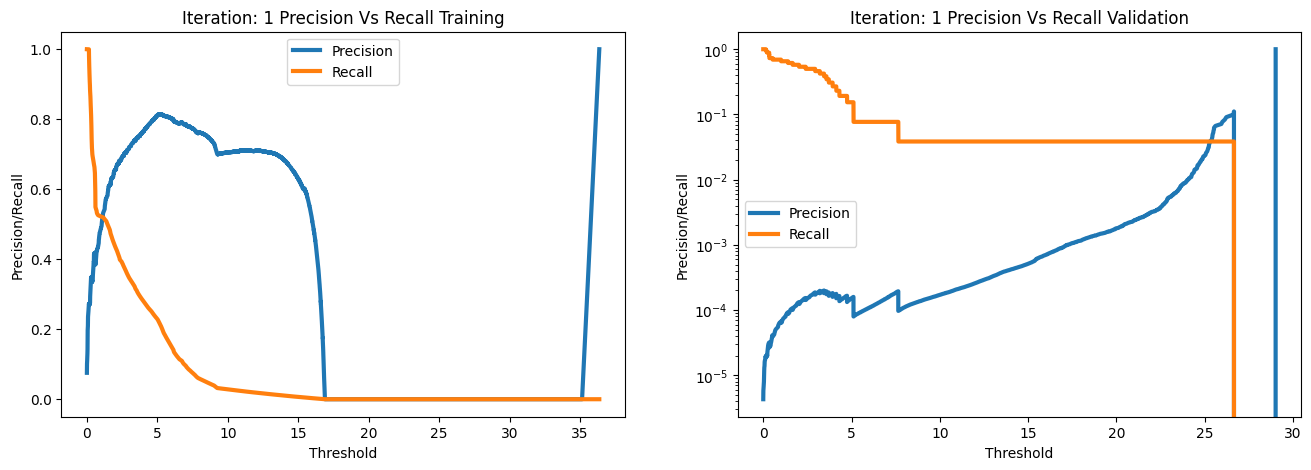

In [64]:
it = 1

# Precision-Recall vs. Threshold for training data
precision_rt_train = training_evaluations[it]['precision_rt']
recall_rt_train = training_evaluations[it]['recall_rt']
threshold_rate_train = training_evaluations[it]['threshold_rt']

# Precision-Recall vs. Threshold for validation data
precision_rt_test = test_evaluations[it]['precision_rt']
recall_rt_test = test_evaluations[it]['recall_rt']
threshold_rate_test = test_evaluations[it]['threshold_rt']

# Plot the Precision-Recall vs. Threshold
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Training plot
ax1.plot(threshold_rate_train, precision_rt_train[1:], label="Precision", linewidth=3)
ax1.plot(threshold_rate_train, recall_rt_train[1:], label="Recall", linewidth=3)
ax1.legend()
ax1.set_title('Iteration: ' + str(it) + ' Precision Vs Recall Training')
ax1.set_ylabel('Precision/Recall')
ax1.set_xlabel('Threshold')

# Validation plot
ax2.plot(threshold_rate_test, precision_rt_test[1:], label="Precision", linewidth=3)
ax2.plot(threshold_rate_test, recall_rt_test[1:], label="Recall", linewidth=3)
ax2.legend()
ax2.set_yscale('log')  # Set the y-axis to log scale for validation plot
ax2.set_title('Iteration: ' + str(it) + ' Precision Vs Recall Validation')
ax2.set_ylabel('Precision/Recall')
ax2.set_xlabel('Threshold')

plt.show()

# Reconstruction

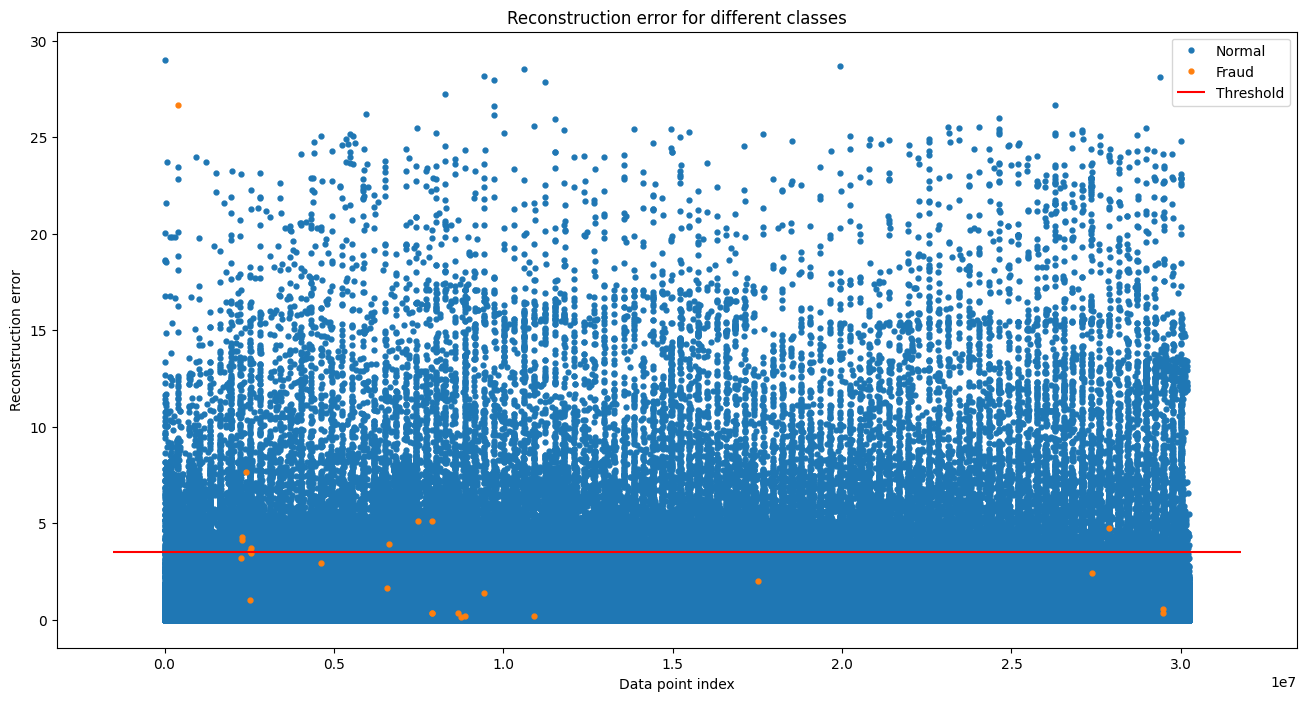

In [65]:
test_threshold = 3.5

# Create DataFrames for reconstruction error and true class labels
test_error_df = pd.DataFrame({'Reconstruction_error': y_test_scores, 'True_class': original_ytest})
train_error_df = pd.DataFrame({'Reconstruction_error': y_train_scores, 'True_class': y_train})

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Group by true class and plot
groups = test_error_df.groupby('True_class')
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='', 
            label="Fraud" if name == 1 else "Normal")

# Draw the threshold line
ax.hlines(test_threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

# Confusion Matrix

In [66]:
def conf_matrix_percent(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
    
    # Normalize the confusion matrix for training data
    conf_matrix_train = conf_matrix_train.astype('float') / conf_matrix_train.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax1)
    ax1.set_title("Training Confusion Matrix (Iteration: {})".format(iteration))
    ax1.set_ylabel('True Class')
    ax1.set_xlabel('Predicted Class')
    
    # Normalize the confusion matrix for test data
    conf_matrix_test = conf_matrix_test.astype('float') / conf_matrix_test.sum(axis=1)[:, np.newaxis]
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax2)
    ax2.set_title("Test Confusion Matrix (Iteration: {})".format(iteration))
    ax2.set_ylabel('True Class')
    ax2.set_xlabel('Predicted Class')

In [67]:
def conf_matrix_normal(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
    
    # Confusion Matrix Visual for Training Data
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 12}, ax=ax1)
    ax1.set_title("Training Confusion Matrix (Iteration: {})".format(iteration))
    ax1.set_ylabel('True Class')
    ax1.set_xlabel('Predicted Class')
    
    # Confusion Matrix Visual for Test Data
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 12}, ax=ax2)
    ax2.set_title("Test Confusion Matrix (Iteration: {})".format(iteration))
    ax2.set_ylabel('True Class')
    ax2.set_xlabel('Predicted Class')

In [73]:
# Define the test threshold
test_threshold = 3.5

# Generate predicted labels for test data based on the reconstruction error and threshold
test_pred_y = [1 if e > test_threshold else 0 for e in test_error_df.Reconstruction_error.values]
train_pred_y = [1 if e > test_threshold else 0 for e in train_error_df.Reconstruction_error.values]

# Calculate the confusion matrices for test and train data
cnf_mtx_test = confusion_matrix(test_error_df.True_class, test_pred_y)
cnf_mtx_train = confusion_matrix(train_error_df.True_class, train_pred_y)

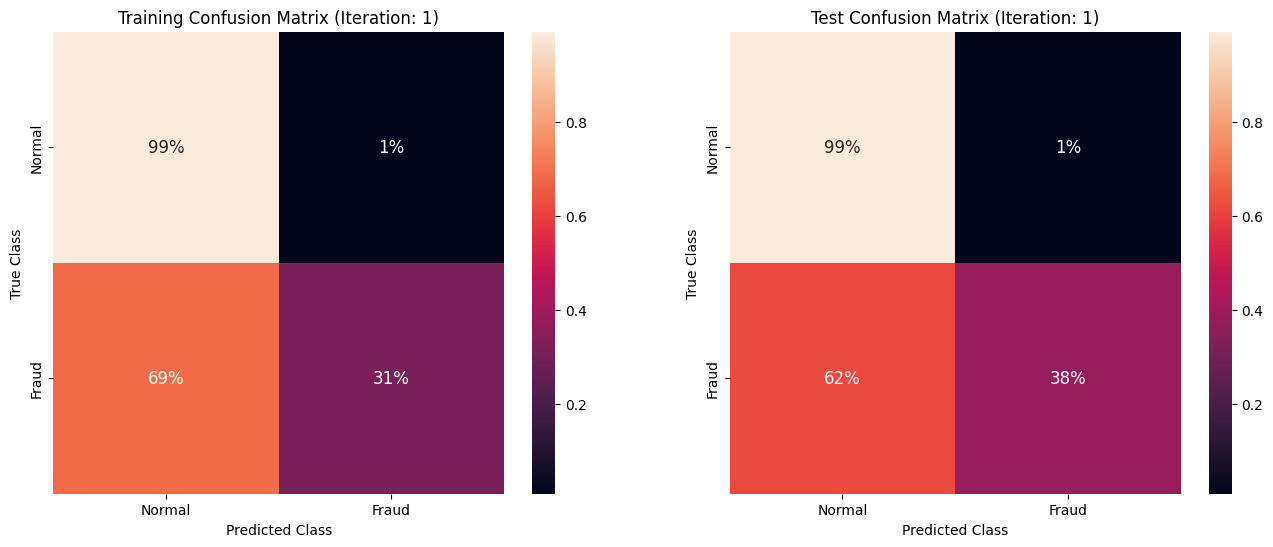

In [74]:
# Visualize the confusion matrices using the conf_matrix_percent function
conf_matrix_percent(cnf_mtx_train, cnf_mtx_test, 1)

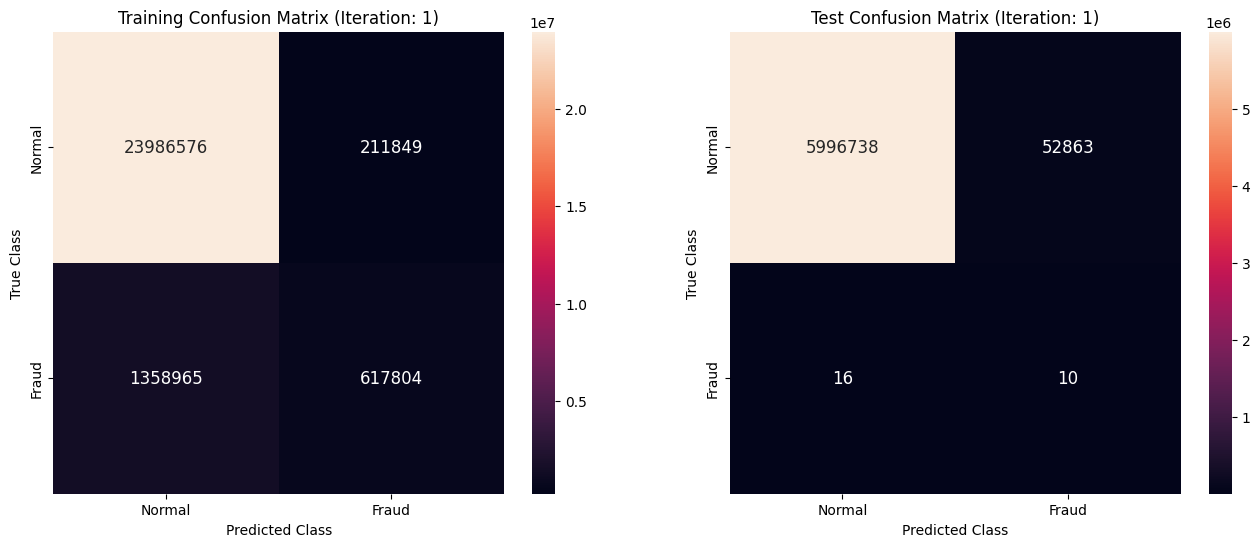

In [75]:
conf_matrix_normal(cnf_mtx_train, cnf_mtx_test, 1)